🔍 What is KNN?
K-Nearest Neighbors (KNN) is a supervised machine learning algorithm used for both classification and regression. However, it is more widely used for classification tasks.

KNN is a non-parametric, instance-based learning algorithm. It doesn't learn an explicit model; instead, it memorizes the training data and makes decisions at the time of prediction.

🧠 How Does KNN Work?
Choose the number of neighbors, K.

Calculate the distance between the query point and all data points (commonly used: Euclidean distance).

Select the K nearest neighbors.

For classification: assign the class with the majority vote among the neighbors.

For regression: compute the average of the target values of the K nearest neighbors.

📐 Common Distance Metrics
Euclidean Distance: sqrt((x1 - x2)² + (y1 - y2)²)

Manhattan Distance: |x1 - x2| + |y1 - y2|



⚙️ Choosing K
A small K (e.g., 1) can be noisy and lead to overfitting.

A large K smooths out predictions but may underfit.

Typically, an odd number is chosen to avoid ties in binary classification.

✅ Advantages
Simple to implement and understand.

No training phase (lazy learner).

Adaptable to multi-class problems.

❌ Disadvantages
Computationally expensive for large datasets (since it needs to compute distance to all points).

Sensitive to irrelevant features and the scale of the data, not suitable for imbalanced data

It is not suitable for outliers

Poor performance on high-dimensional data due to the "curse of dimensionality".

🛠️ Tips
Always normalize or scale your features (e.g., using StandardScaler or MinMaxScaler).

Use Cross-Validation to choose the optimal value of K.

Use KD-Trees or Ball Trees for faster nearest-neighbor search in large datasets.



In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
data=pd.read_csv("glass.csv")

In [3]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
data["Type"].value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [5]:
data.duplicated().sum()

1

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
X=data.drop("Type",axis=1)

In [8]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [10]:
y=data["Type"]

In [11]:
y


0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 213, dtype: int64

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
X_train

array([[0.20939421, 0.32030075, 0.78396437, ..., 0.20961538, 0.        ,
        0.        ],
       [0.48112379, 0.52030075, 0.84187082, ..., 0.32211538, 0.        ,
        0.7254902 ],
       [0.67998244, 0.07518797, 0.        , ..., 0.85480769, 0.        ,
        0.        ],
       ...,
       [0.20851624, 0.37744361, 0.74387528, ..., 0.23365385, 0.        ,
        0.        ],
       [0.08077261, 0.5518797 , 0.38752784, ..., 0.17307692, 0.        ,
        0.        ],
       [0.70676032, 0.46165414, 0.70155902, ..., 0.5625    , 0.        ,
        0.        ]])

In [16]:
X_test


array([[ 0.2809482 ,  0.34135338,  0.80178174,  0.33333333,  0.56785714,
         0.33928571,  0.25096154,  0.        ,  0.21568627],
       [ 0.18261633,  0.54887218,  0.        ,  0.73831776,  0.5875    ,
         0.02380952,  0.31634615,  0.2031746 ,  0.        ],
       [ 0.45522388,  0.34887218,  0.81291759,  0.18068536,  0.44821429,
         0.11309524,  0.39038462,  0.        ,  0.33333333],
       [ 0.22300263,  0.52180451,  0.        ,  0.7788162 ,  0.65178571,
         0.02380952,  0.3125    ,  0.12698413,  0.17647059],
       [ 0.24495171,  0.38646617,  0.81069042,  0.38629283,  0.48571429,
         0.38690476,  0.21538462,  0.        ,  0.56862745],
       [ 0.72958736,  0.28721805,  0.        ,  0.11838006,  0.39464286,
         0.03571429,  0.82788462,  0.        ,  0.        ],
       [ 0.28358209,  0.31278195,  0.78841871,  0.29283489,  0.6125    ,
         0.3452381 ,  0.25      ,  0.        ,  0.        ],
       [ 0.23266023,  0.40150376,  0.77728285,  0.38317757,  0

In [18]:
def knn_training(X_train,y_train,X_test,K):
    '''
    X_train--> training data
    y_train--> label for the training
    X_test--> it is for the validation
    K--> it is number of the nearest neighbours
    
    '''
    knn = KNeighborsClassifier(n_neighbors = K)
    knn.fit(X_train,y_train)
    prediction = knn.predict(X_test)
    return prediction
    

To decide the number of K:

we use heuristics method=sqrt of total record==> this as a nearest neigbour

In [19]:
import math

n=data.shape[0]
K=math.sqrt(n)

In [20]:
K=int(K)

In [23]:
pred=knn_training(X_train,y_train,X_test,K)

In [24]:
accuracy_score(y_test,pred)

0.5581395348837209

In [28]:
K_value=range(1,21)
accuracy=[]

for K in K_value:
    y_pred=knn_training(X_train,y_train,X_test,K)
    acc= accuracy_score(y_test,y_pred)
    accuracy.append(acc)
    print(f"For K value {K} , accuracy: {acc}")

For K value 1 , accuracy: 0.7209302325581395
For K value 2 , accuracy: 0.6744186046511628
For K value 3 , accuracy: 0.6744186046511628
For K value 4 , accuracy: 0.6744186046511628
For K value 5 , accuracy: 0.6511627906976745
For K value 6 , accuracy: 0.6744186046511628
For K value 7 , accuracy: 0.6976744186046512
For K value 8 , accuracy: 0.6511627906976745
For K value 9 , accuracy: 0.627906976744186
For K value 10 , accuracy: 0.627906976744186
For K value 11 , accuracy: 0.627906976744186
For K value 12 , accuracy: 0.5581395348837209
For K value 13 , accuracy: 0.6046511627906976
For K value 14 , accuracy: 0.5581395348837209
For K value 15 , accuracy: 0.5348837209302325
For K value 16 , accuracy: 0.5581395348837209
For K value 17 , accuracy: 0.5581395348837209
For K value 18 , accuracy: 0.5581395348837209
For K value 19 , accuracy: 0.6046511627906976
For K value 20 , accuracy: 0.627906976744186


In [29]:
accuracy

[0.7209302325581395,
 0.6744186046511628,
 0.6744186046511628,
 0.6744186046511628,
 0.6511627906976745,
 0.6744186046511628,
 0.6976744186046512,
 0.6511627906976745,
 0.627906976744186,
 0.627906976744186,
 0.627906976744186,
 0.5581395348837209,
 0.6046511627906976,
 0.5581395348837209,
 0.5348837209302325,
 0.5581395348837209,
 0.5581395348837209,
 0.5581395348837209,
 0.6046511627906976,
 0.627906976744186]

In [30]:
max(accuracy)

0.7209302325581395

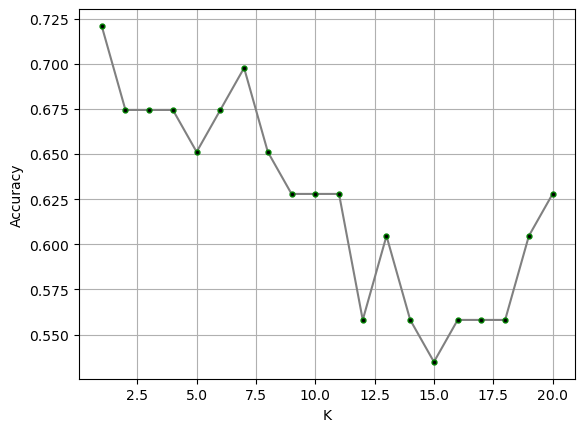

In [31]:
plt.plot(K_value,accuracy,c="grey",marker=".",ms=7,mfc="black",mec="green")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()